In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

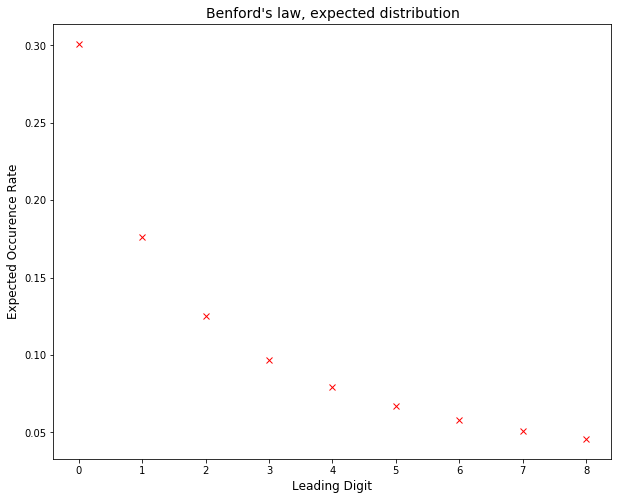

In [79]:
def benford_law(base):
    """Get benfords law distribution for a particular base."""
    d = np.arange(1, base).astype('float')
    dist = np.log(1 + d ** -1) / np.log(base)
    return dist

dist_expected = benford_law(10)

plt.figure(figsize=(10, 8))
plt.plot(dist_expected, 'rx')
plt.title("Benford's law, expected distribution", fontsize=16)
plt.xlabel('Leading Digit', fontsize=12)
plt.ylabel('Expected Occurence Rate', fontsize=12)
plt.show()

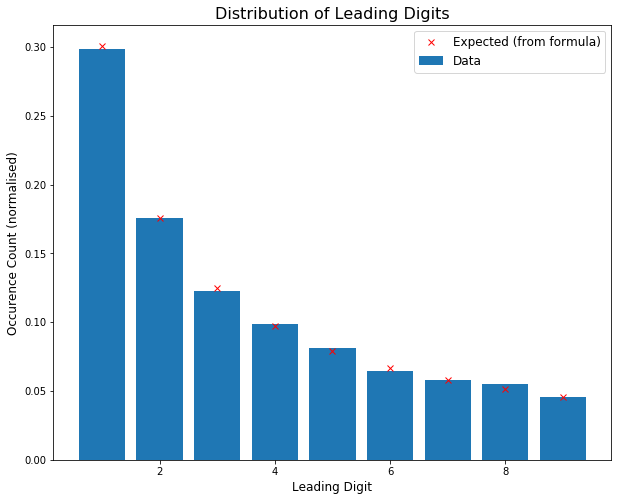

In [130]:
def get_first_digit(x: np.ndarray):
    """Get first digit from a numpy array."""
    # Get order of magnitude of x
    n = np.floor(np.log10(x))
    y = x / 10 ** n
    z = np.floor(y)
    return z

def get_leading_digit_hist(leading_digits):
    bins = np.arange(1, 10)
    bin_edges = np.arange(1, 11)

    hist = np.histogram(leading_digits, bin_edges)[0]
    
    return bins, hist

def remove_zeros(x):
    """Remove zeros from an array of numbers."""
    y = x[x.nonzero()]
    return y
    

def plot_leading_digit_hist(bins, hist):
    
    hist_norm = hist / np.sum(hist)
    
    dist_expected = benford_law(10)
    
    plt.figure(figsize=(10,8))
    plt.bar(bins, hist_norm, label='Data')
    plt.plot(bins, dist_expected, 'rx', label='Expected (from formula)')
    plt.title('Distribution of Leading Digits', fontsize=16)
    plt.xlabel('Leading Digit', fontsize=12)
    plt.ylabel('Occurence Count (normalised)', fontsize=12)
    plt.legend(fontsize=12)
    plt.show()

def get_leading_digits_and_plot_histogram(x):
    y = remove_zeros(x)
    leading_digits = get_first_digit(y)
    bins, hist = get_leading_digit_hist(leading_digits)
    plot_leading_digit_hist(bins, hist)


# simulate some numbers
x = 10 ** np.random.rand(10 ** 4)

get_leading_digits_and_plot_histogram(x)

In [147]:
import os
import time

start_dir = r'C:'

count = 0

tic = time.time()

for dirpath, _, filenames in os.walk(start_dir):
    count += len(filenames)
    
# Add on some contingency space in case the number of files changes during run
count1 = int(count * 1.01)

file_sizes = np.zeros(count1)

i = 0
for dirpath, _, filenames in os.walk(start_dir):
    for fn in filenames:
        try:
            fp = os.path.join(dirpath, fn)
            file_sizes[i] = os.path.getsize(fp)
        except:
            pass
        i += 1

toc = time.time()

print('Time taken: {:.2f}s '.format(toc - tic))
print('Number of files:', count)

Time taken: 298.87s 
Number of files: 1412554


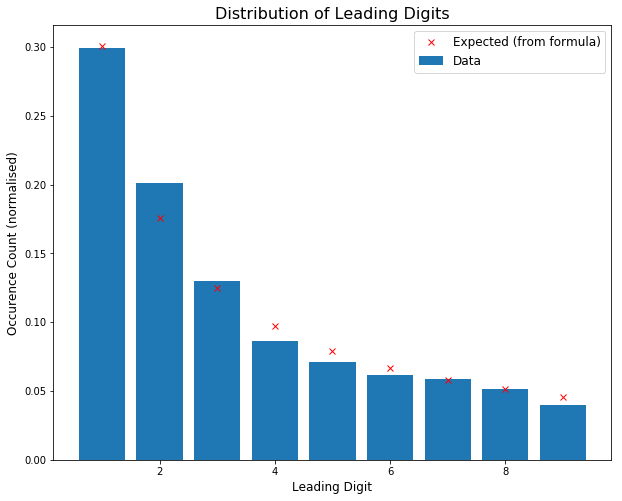

In [148]:
get_leading_digits_and_plot_histogram(file_sizes)